<a href="https://colab.research.google.com/github/Yosri15/Loan_Approval_Prediction/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Équilibrage des classes
from imblearn.over_sampling import SMOTE


In [3]:
#Chargement des données
df_train = pd.read_csv('/content/drive/MyDrive/Projet Loan/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Projet Loan/test.csv')
df_sub = pd.read_csv('/content/drive/MyDrive/Projet Loan/sample_submission.csv')
df_origi = pd.read_csv('/content/drive/MyDrive/Projet Loan/credit_risk_dataset.csv')

In [4]:
df_origi.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df_origi.shape

(32581, 12)

In [6]:
df_train.shape

(58645, 13)

In [7]:
# Afficher les premières lignes de la base de données
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
#Exploration des données
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [9]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [10]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [11]:
# Vérifier les valeurs manquantes
df_train.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [12]:
# Suppression de la colonne 'id'
df_train.drop(columns=['id'], inplace=True)
df_test.drop(columns=['id'], inplace=True)

In [13]:
df_train.shape,df_test.shape

((58645, 12), (39098, 11))

In [14]:
# Fusion avec le dataset original pour enrichir les données
df_train = pd.concat([df_train, df_origi], axis=0)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91226 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  91226 non-null  int64  
 1   person_income               91226 non-null  int64  
 2   person_home_ownership       91226 non-null  object 
 3   person_emp_length           90331 non-null  float64
 4   loan_intent                 91226 non-null  object 
 5   loan_grade                  91226 non-null  object 
 6   loan_amnt                   91226 non-null  int64  
 7   loan_int_rate               88110 non-null  float64
 8   loan_percent_income         91226 non-null  float64
 9   cb_person_default_on_file   91226 non-null  object 
 10  cb_person_cred_hist_length  91226 non-null  int64  
 11  loan_status                 91226 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.0+ MB


In [16]:
df_train.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_percent_income,0
cb_person_default_on_file,0


In [17]:
df_test.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [18]:
# Remplissage des valeurs manquantes
df_train['person_emp_length'] = df_train['person_emp_length'].fillna(df_train['person_emp_length'].mean())
df_train['loan_int_rate'] = df_train['loan_int_rate'].fillna(df_train['loan_int_rate'].mean())

# **EDA**

In [19]:
target = 'loan_status'

In [20]:
features = df_train.drop(target, axis=1).columns.tolist()

In [21]:
categorical_features = df_train.select_dtypes(include='object').columns.tolist()

In [22]:
numerical_features = list(set(features) - set(categorical_features))

In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,91226.0,27.616480,6.148115,20.00,23.00,26.000000,30.00,144.00
person_income,91226.0,64770.706224,47936.961097,4000.00,40000.00,57000.000000,78000.00,6000000.00
person_emp_length,91226.0,4.732119,4.005274,0.00,2.00,4.000000,7.00,123.00
loan_amnt,91226.0,9350.348607,5848.605423,500.00,5000.00,8000.000000,12000.00,35000.00
loan_int_rate,91226.0,10.789508,3.055439,5.42,7.88,10.789508,12.99,23.22
loan_percent_income,91226.0,0.163154,0.097491,0.00,0.09,0.140000,0.22,0.83
cb_person_cred_hist_length,91226.0,5.810219,4.038412,2.00,3.00,4.000000,8.00,30.00
loan_status,91226.0,0.169447,0.375149,0.00,0.00,0.000000,0.00,1.00


In [24]:
df_train[categorical_features].describe(include='O').T

,count,unique,top,freq
person_home_ownership,91226,4,RENT,47040
loan_intent,91226,6,EDUCATION,18724
loan_grade,91226,7,A,31761
cb_person_default_on_file,91226,2,N,76779


In [25]:
for col in categorical_features:
    display(df_train.groupby(col)[['loan_amnt', 'loan_int_rate']].agg(['min', 'mean', 'max']))

loan_amnt                      loan_int_rate             \
                            min          mean    max           min       mean   
person_home_ownership                                                           
MORTGAGE                    500  10177.988136  35000          5.42  10.154897   
OTHER                      1000  10599.617347  25000          5.79  11.735222   
OWN                         900   8871.172667  35000          5.42  10.773927   
RENT                        500   8730.129188  35000          5.42  11.303732   

                              
                         max  
person_home_ownership         
MORTGAGE               22.48  
OTHER                  20.52  
OWN                    21.27  
RENT                   23.22

loan_amnt                      loan_int_rate             \
                        min          mean    max           min       mean   
loan_intent                                                                 
DEBTCONSOLIDATION       500   9311.842105  35000          5.42  10.740802   
EDUCATION               700   9200.219344  35000          5.42  10.768989   
HOMEIMPROVEMENT         500  10273.793121  35000          5.42  10.985154   
MEDICAL                 500   8976.930315  35000          5.42  10.846264   
PERSONAL                500   9358.476540  35000          5.42  10.739256   
VENTURE                 500   9379.518436  35000          5.42  10.723682   

                          
                     max  
loan_intent               
DEBTCONSOLIDATION  22.11  
EDUCATION          21.74  
HOMEIMPROVEMENT    23.22  
MEDICAL            21.74  
PERSONAL           22.06  
VENTURE            23.22

loan_amnt                      loan_int_rate                  
                 min          mean    max           min       mean    max
loan_grade                                                               
A                500   8478.378357  35000      5.420000   7.441947  19.04
B                500   9748.841431  35000      5.990000  11.014408  17.56
C                500   9085.190637  35000      5.790000  13.396767  16.29
D               1000  10658.709007  35000      6.000000  15.221815  19.13
E               1000  12537.645717  35000      6.000000  16.707653  23.06
F               1200  13997.756410  35000     10.789508  18.068479  22.06
G               1500  15618.298969  35000     10.789508  19.789665  23.22

loan_amnt                     loan_int_rate  \
                                min         mean    max           min   
cb_person_default_on_file                                               
N                               500  9276.934865  35000          5.42   
Y                               750  9740.508064  35000          5.99   

                                             
                                mean    max  
cb_person_default_on_file                    
N                          10.135789  21.74  
Y                          14.263717  23.22

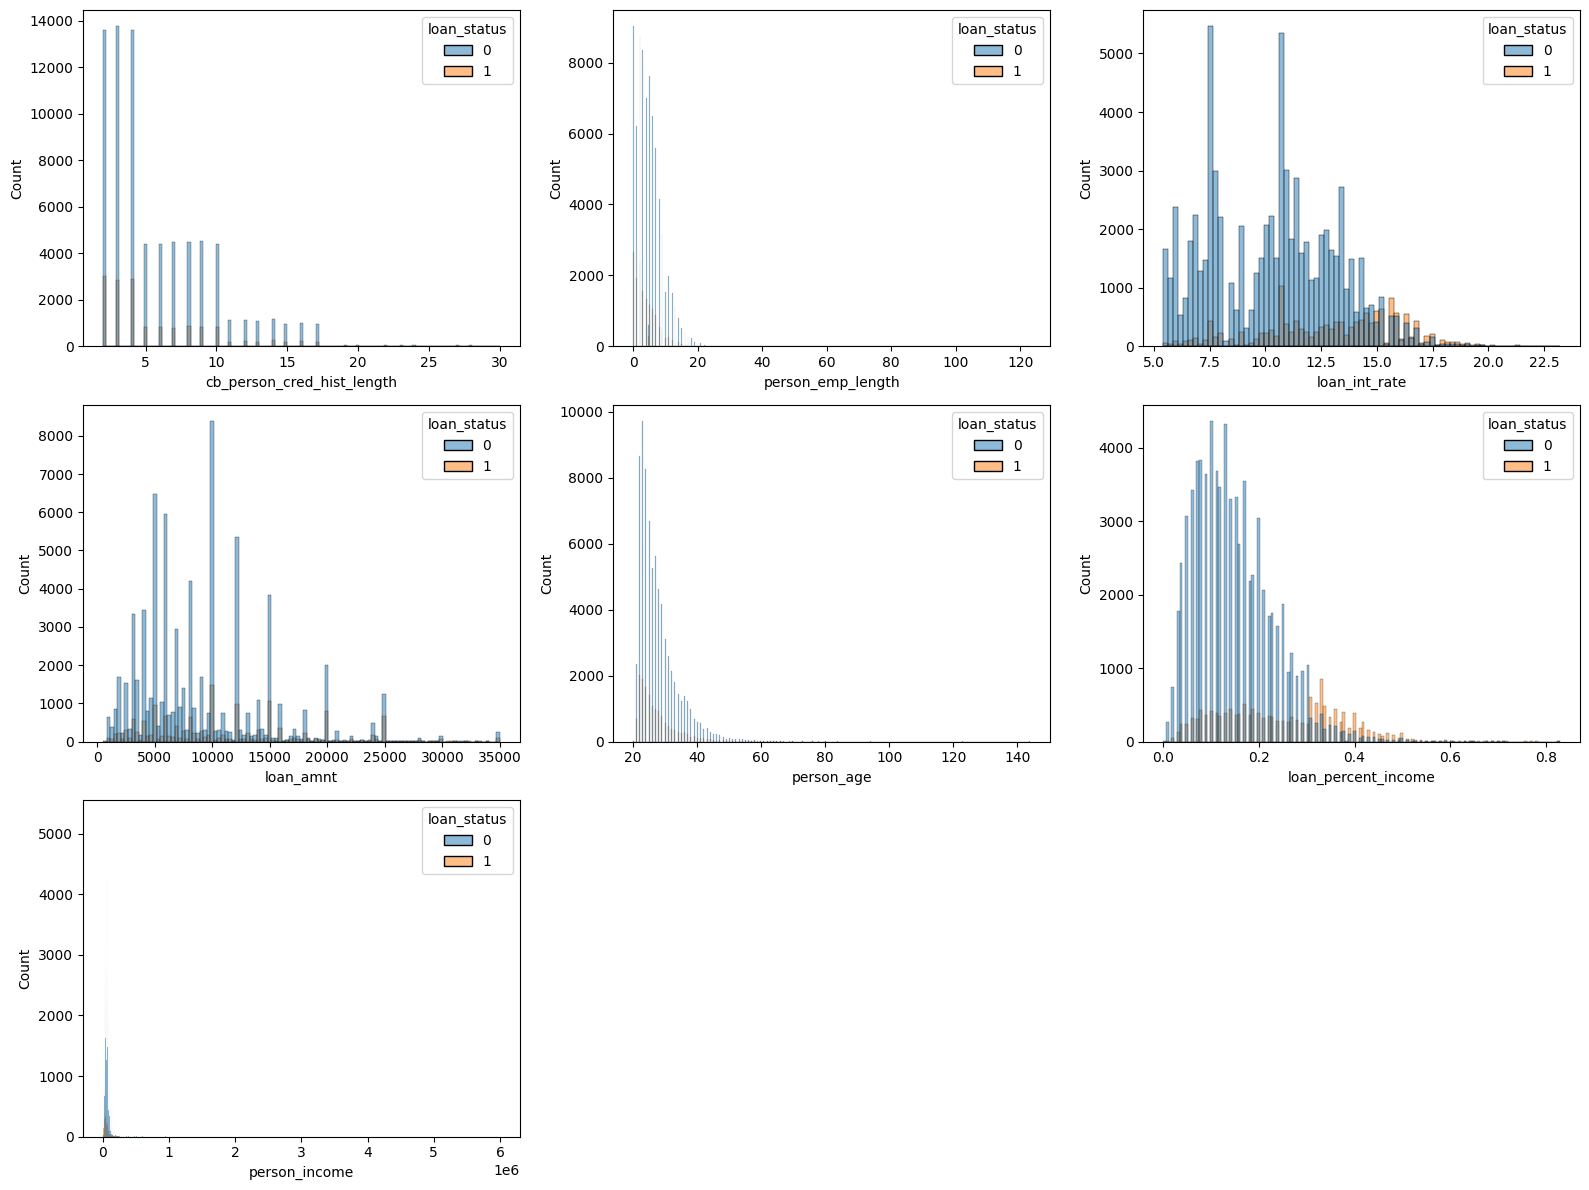

In [26]:
#Distribution of Numerical Features¶
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_train, x=col, hue=target)

plt.tight_layout()
plt.show()

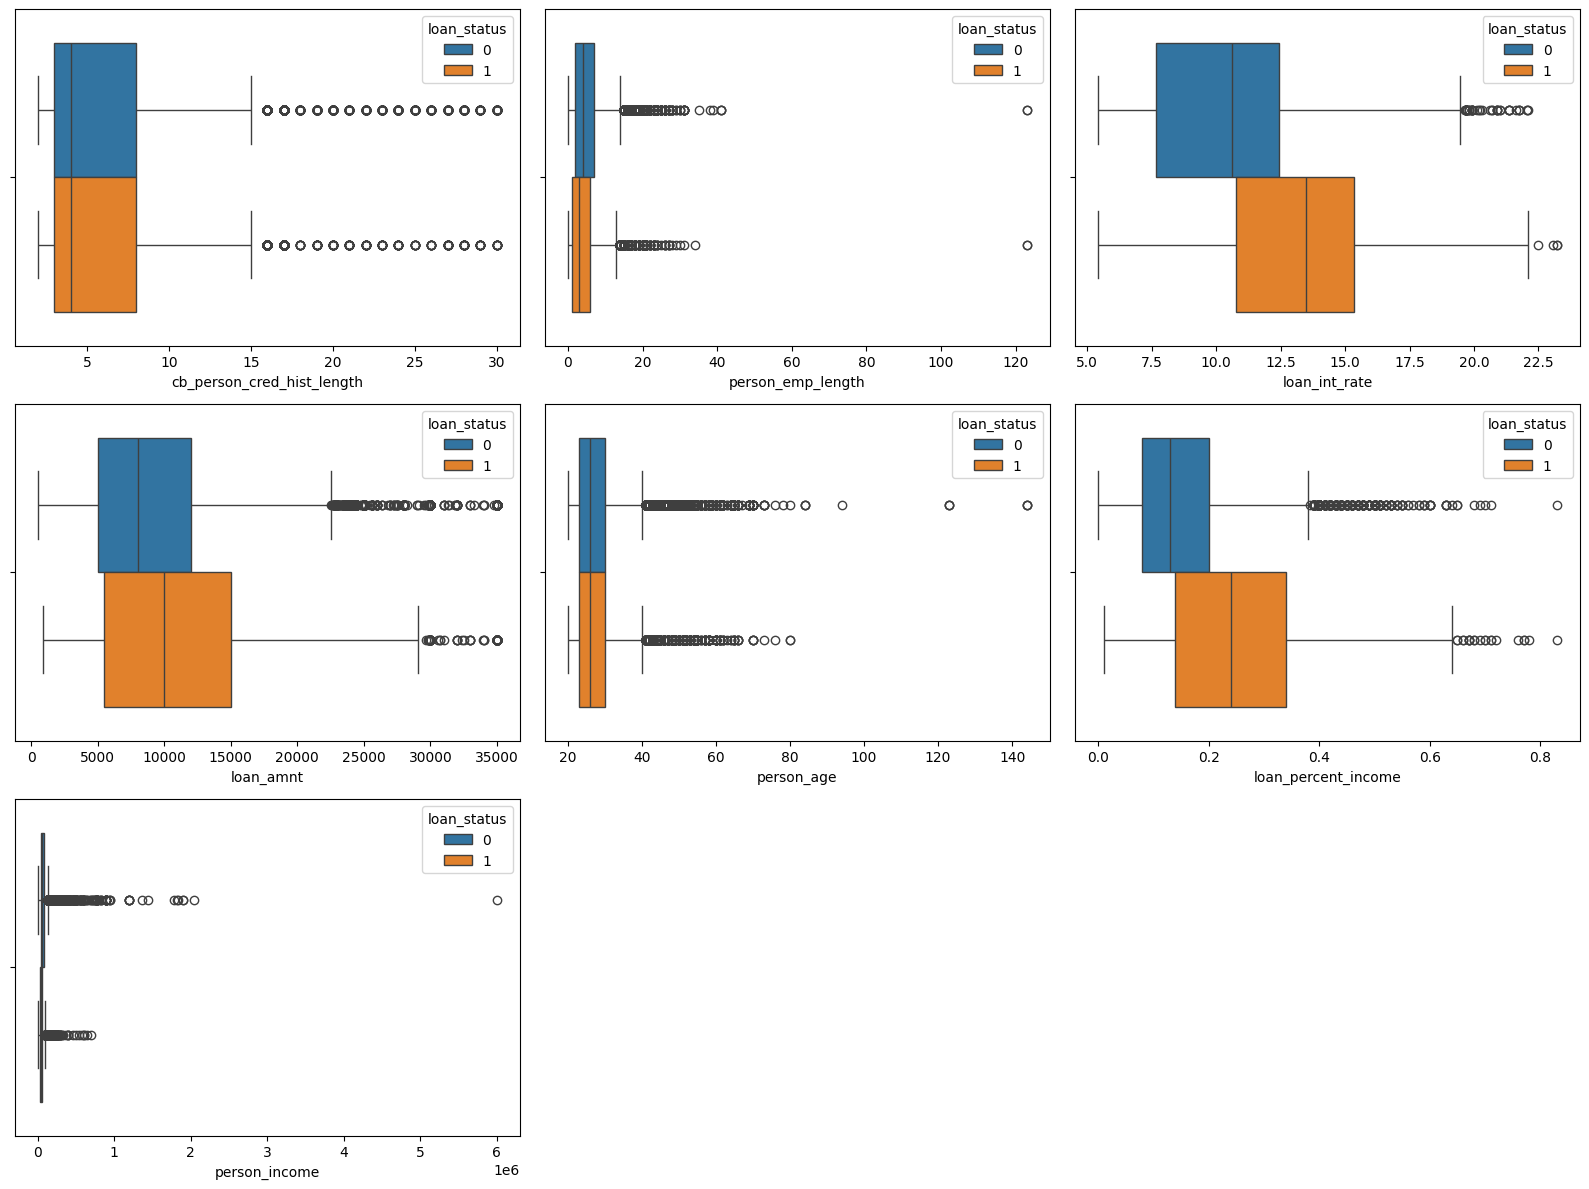

In [27]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df_train, x=col, hue=target)

plt.tight_layout()
plt.show()

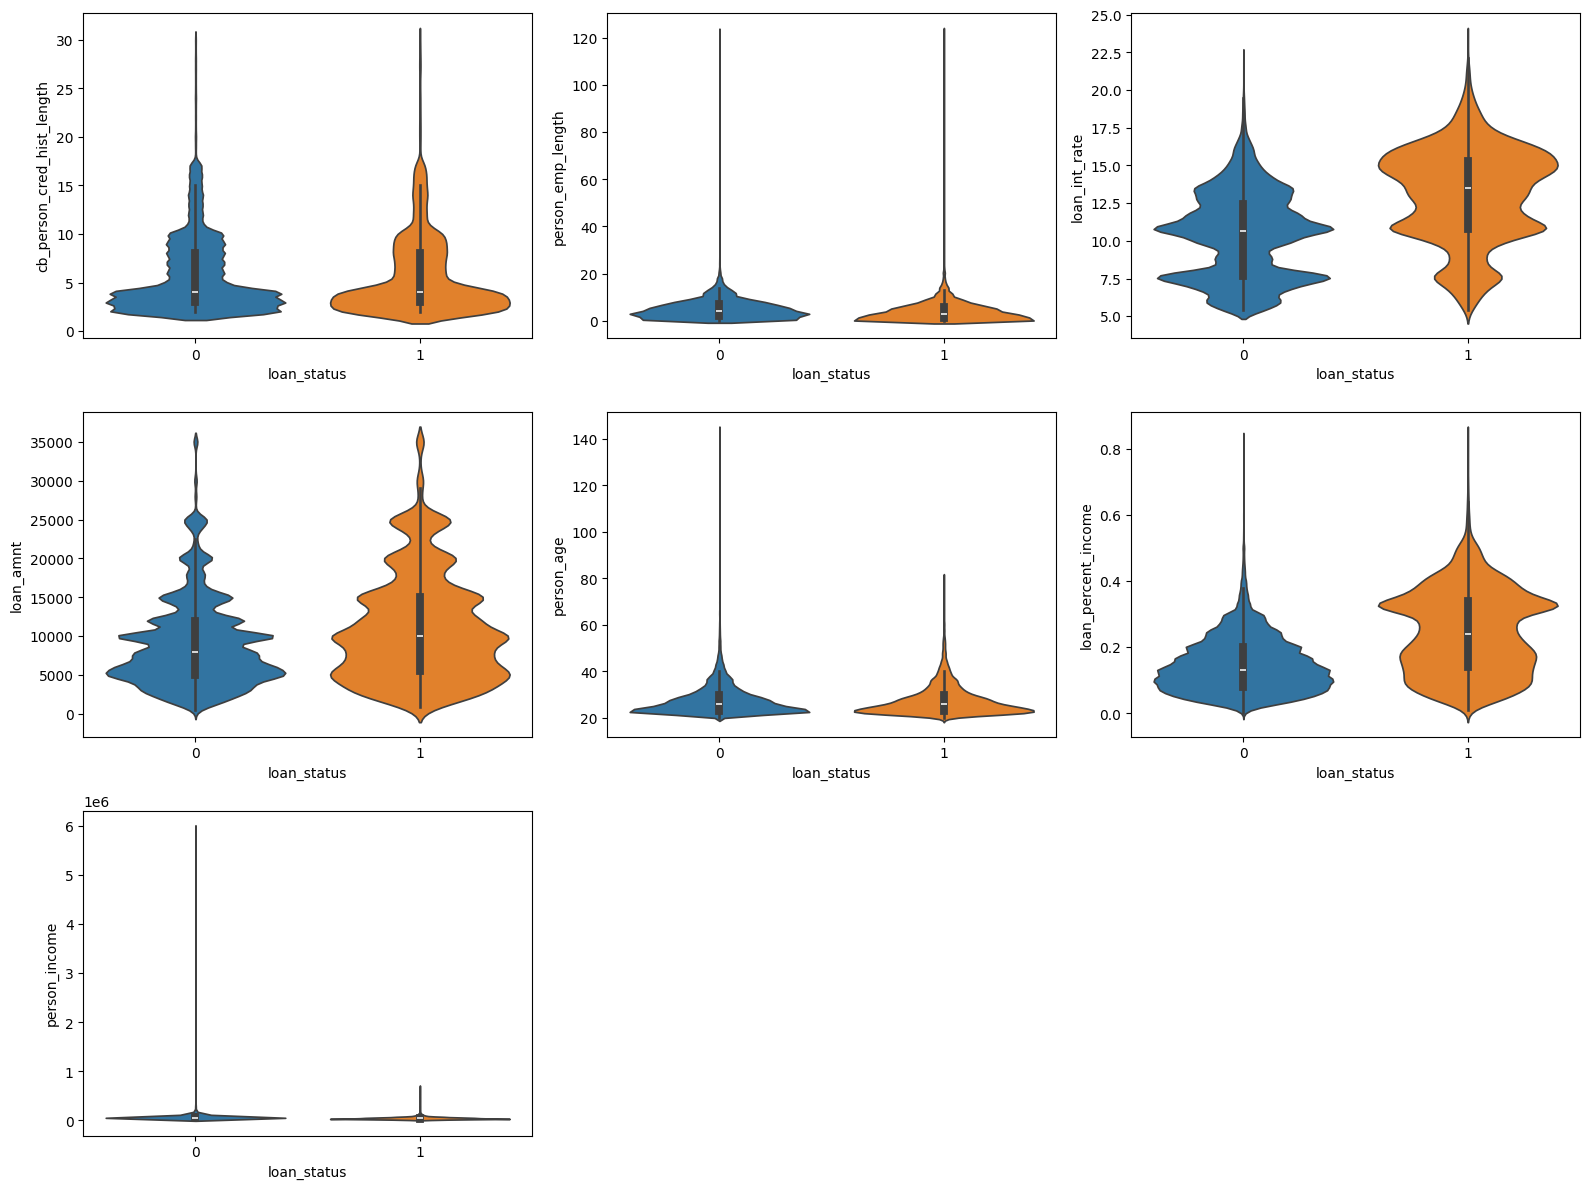

In [28]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.violinplot(df_train, x=target, y=col, hue=target, legend=None)

plt.tight_layout()
plt.show()

# **Distribution of Categorical Features**

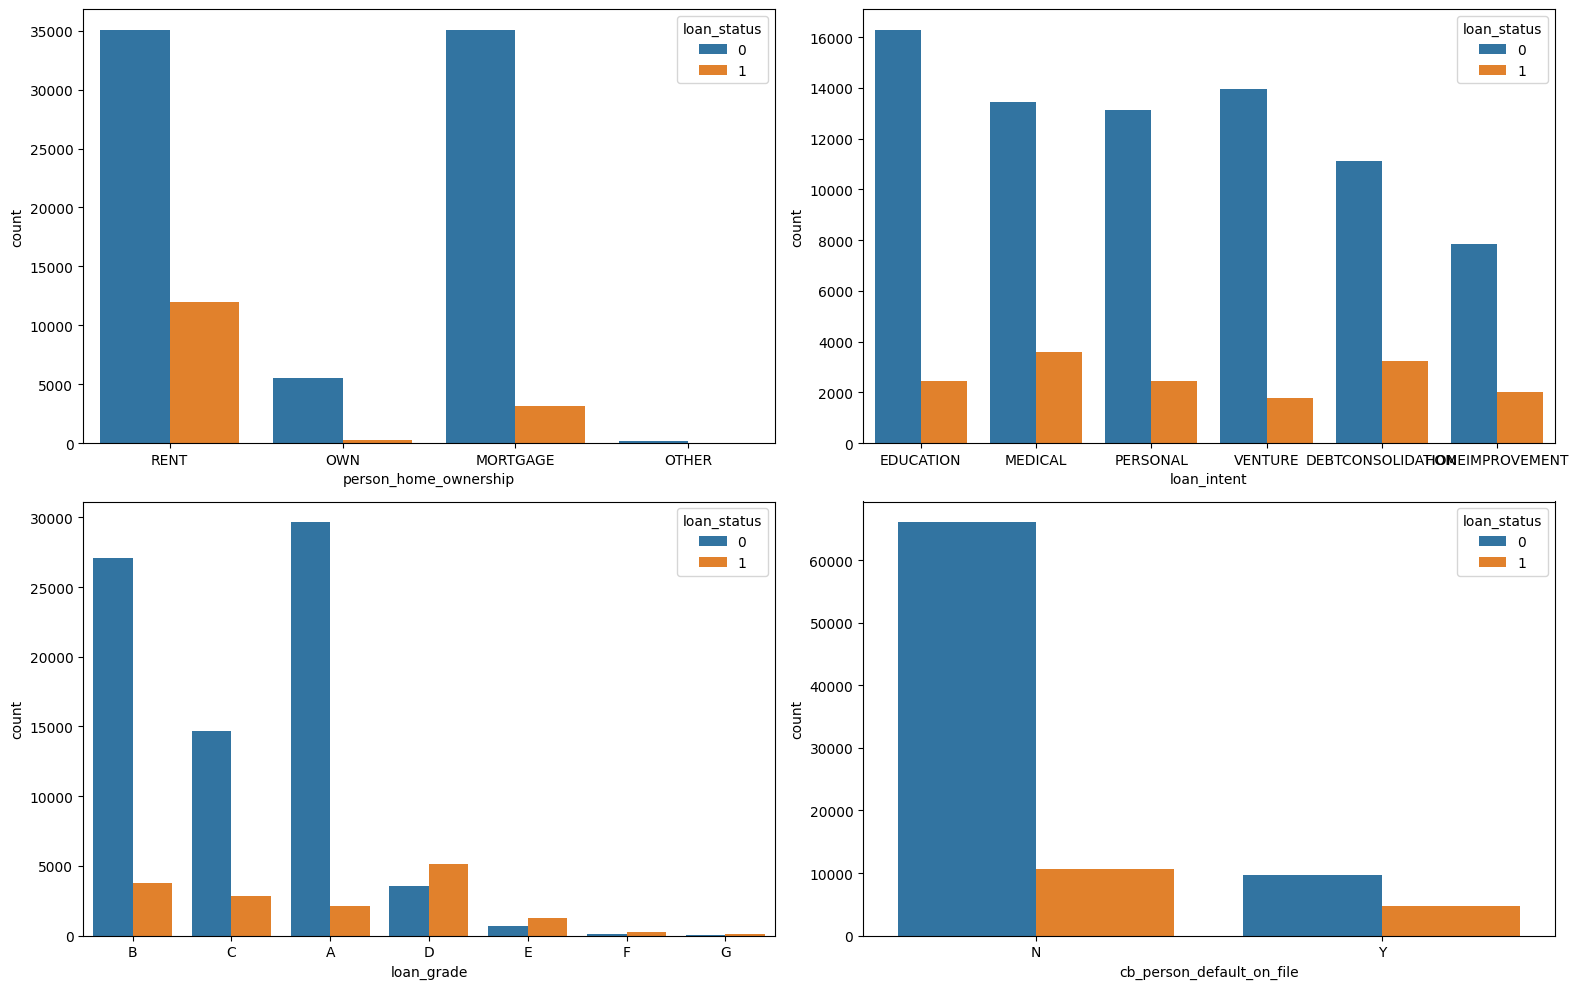

In [29]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(df_train, x=col, hue=target)

plt.tight_layout()
plt.show()

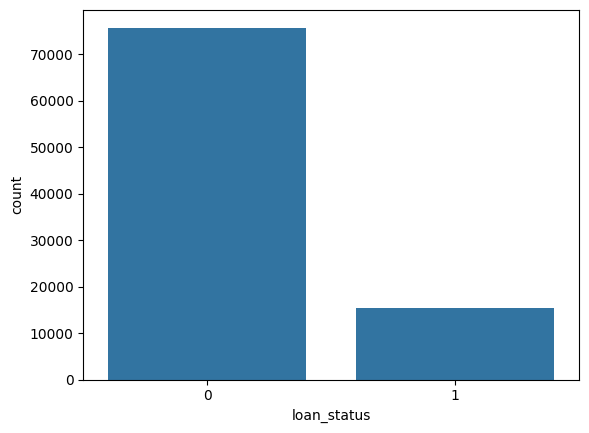

In [30]:
#Target distribution
sns.countplot(df_train, x=target)
plt.show()

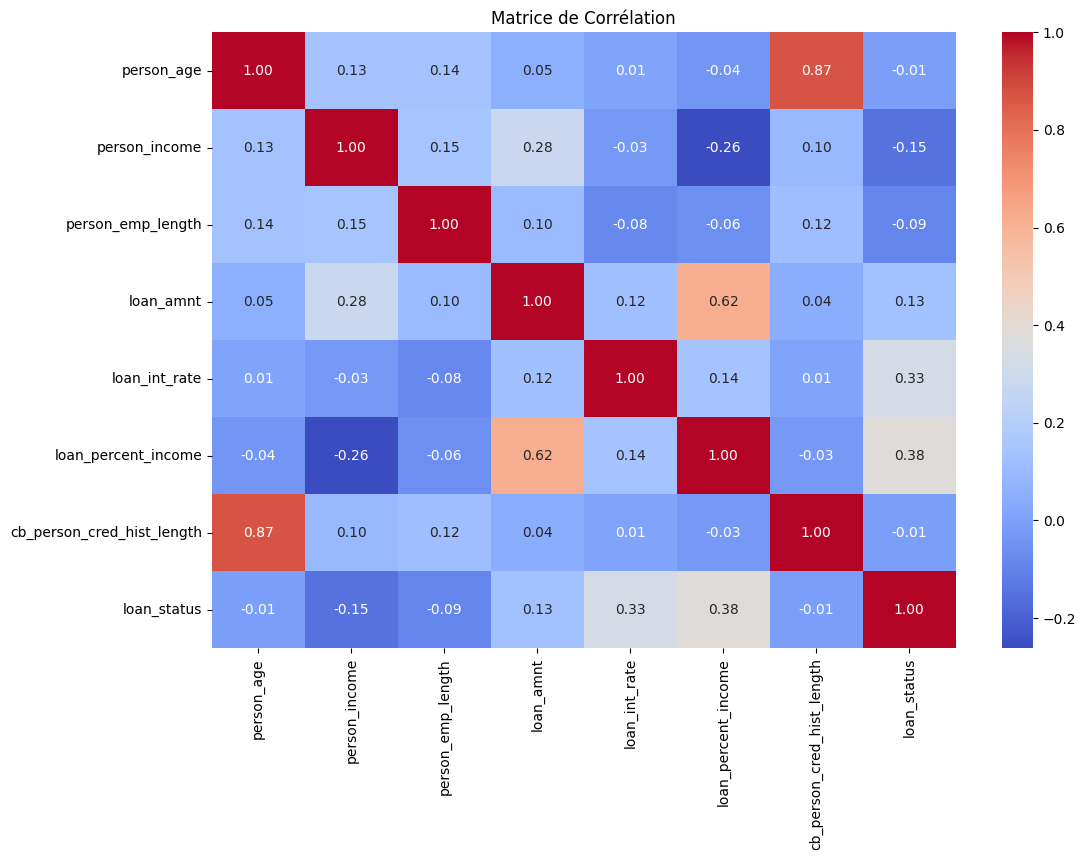

In [31]:
plt.figure(figsize=(12,8))
numerical_df = df_train.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.show()

# **Prétraitement de base**


In [32]:
# Encodage des variables catégorielles avec LabelEncoder
le = LabelEncoder()
for col in categorical_features:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

In [33]:
# Séparation des features et de la target
X = df_train.drop('loan_status', axis=1)
y = df_train['loan_status']

In [34]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
def evaluate_model(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    auc_scores = []

    plt.figure(figsize=(8, 6))

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # SMOTE uniquement sur le training set
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X_train, y_train)

        # Entraînement
        model.fit(X_res, y_res)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Métriques
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        auc_scores.append(auc_score)

        # Courbe ROC pour ce fold
        plt.plot(fpr, tpr, alpha=0.3, lw=1, label=f'Fold {fold+1}' if fold ==0 else "")

    # Affichage
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {model.__class__.__name__}')
    plt.legend()
    plt.show()

    print(f"AUC Moyen ({n_splits}-Folds): {np.mean(auc_scores):.3f} ± {np.std(auc_scores):.3f}")
    return np.mean(auc_scores)

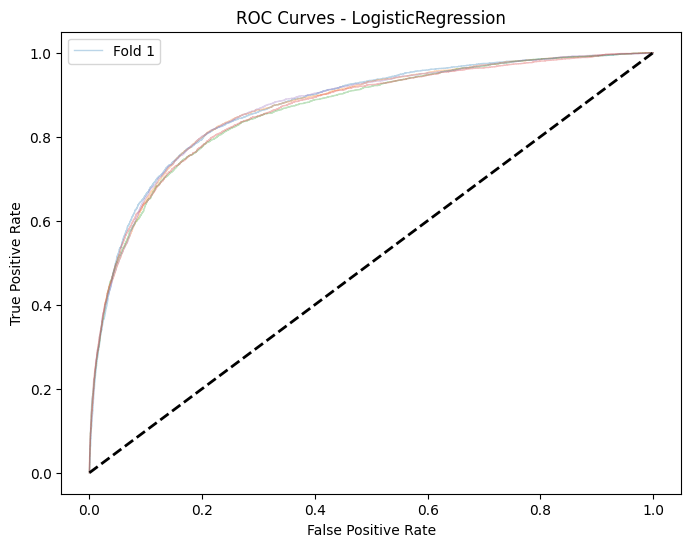

AUC Moyen (5-Folds): 0.868 ± 0.004


In [36]:
# LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
lr_score = evaluate_model(model_lr, X_scaled, y)

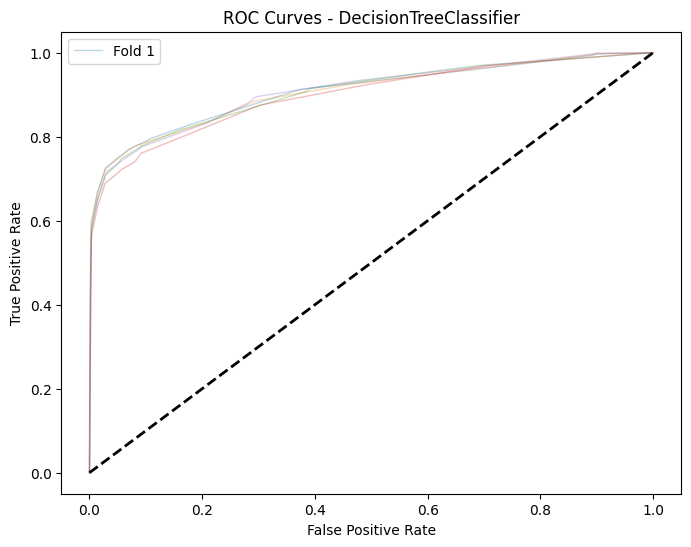

AUC Moyen (5-Folds): 0.905 ± 0.004


In [37]:
# DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5)
dt_score = evaluate_model(model_dt, X_scaled, y)

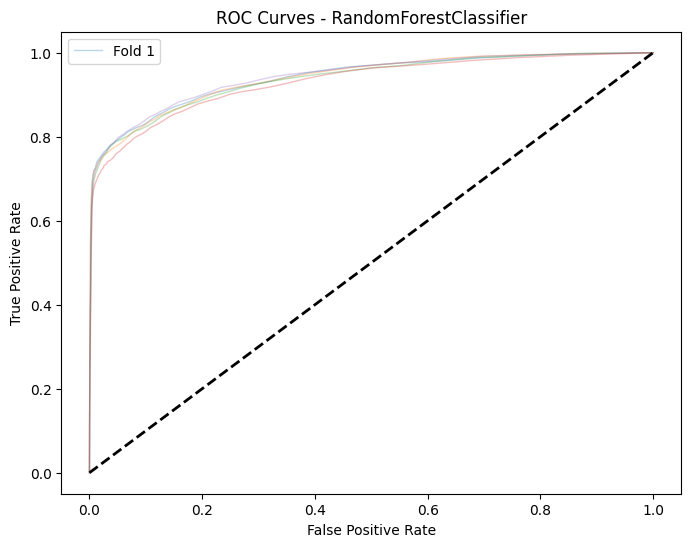

AUC Moyen (5-Folds): 0.938 ± 0.004


In [38]:
#RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
rf_score = evaluate_model(model_rf, X_scaled, y)

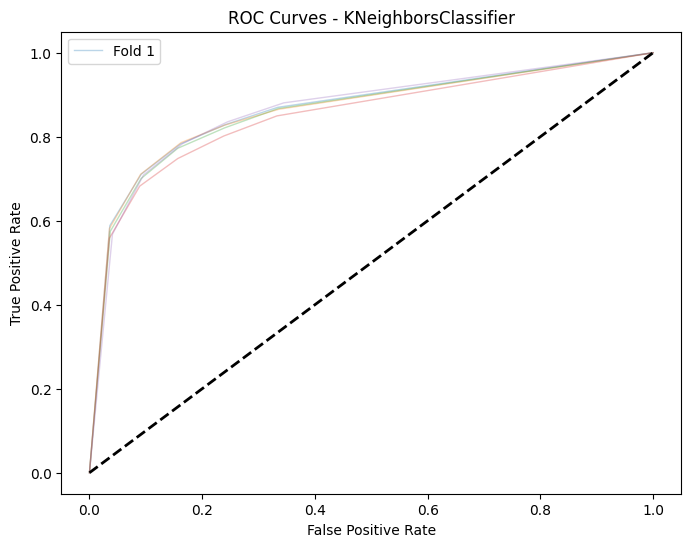

AUC Moyen (5-Folds): 0.861 ± 0.006


In [39]:
#KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
knn_score = evaluate_model(model_knn, X_scaled, y)

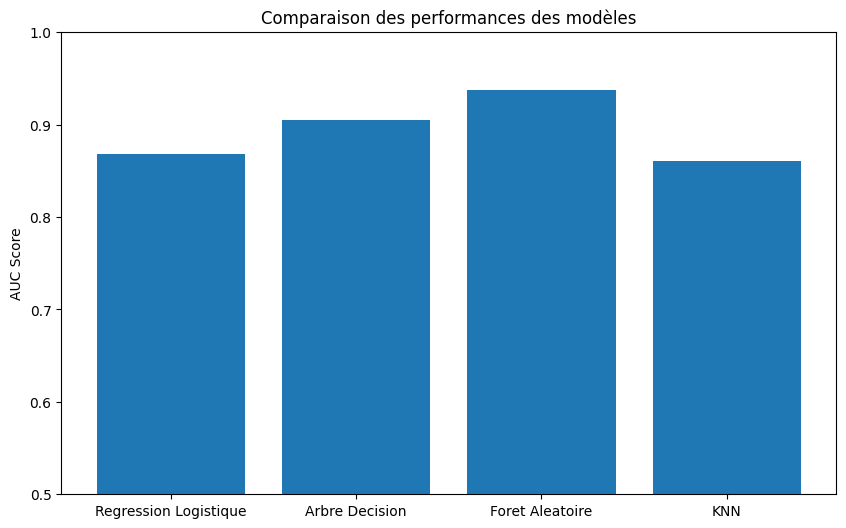

In [40]:
results = {
    'Regression Logistique': lr_score,
    'Arbre Decision': dt_score,
    'Foret Aleatoire': rf_score,
    'KNN': knn_score,
}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Comparaison des performances des modèles')
plt.ylabel('AUC Score')
plt.ylim(0.5, 1.0)
plt.show()

In [41]:
X_test_scaled = scaler.transform(df_test)
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_scaled, y)
df_sub['loan_status'] = best_model.predict_proba(X_test_scaled)[:, 1]
df_sub.to_csv('submission_final.csv', index=False)